# Handling data in PyTorch
    
In this script, we see how to handle data in PyTorch using the `Dataset` and `Dataloader` objects. The focus is on an image and a speech dataset for convenience. We will adress text data specifically and the associated preprocessing in a future lab.

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import io
import torchaudio
import os
import fnmatch
from IPython.display import Audio, display
from matplotlib import pyplot as plt

## Image data

First, let's play around with images. We use the data provided in `data/image_corpus`, which is extracted from the [Pokemon dataset](https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types).

### Example

In [2]:
# Load an image from the corpus, convert it to a float tensor, and set the range of values in [0, 1]
image_path = '../datasets/image_corpus/pikachu.png'
x = io.read_image(image_path, mode=io.ImageReadMode.RGB)
x = x.float()
x = x/ x.max()

In [3]:
# When loaded as RGB images, such a tensor has 3 channels (red, green, blue)
print(x.shape)

torch.Size([3, 120, 120])


In [15]:
# TO DO: Reshape x so that it's [height, width, channels] (useful for vizualization)
x = x.reshape(120, 120, 3)


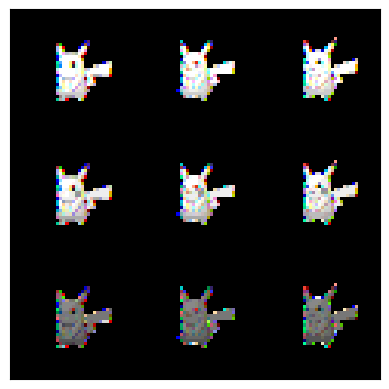

In [16]:
# Display the image
plt.figure()
plt.imshow(x)
plt.xticks([]), plt.yticks([])
plt.show()

In [17]:
# You can get the name of the pokemon by removing the folder path ('data/image_corpus/') and extension ('.png') from the image_path
name = image_path.replace('../datasets/image_corpus/', '').replace('.png', '')
print(name)

pikachu


### Dataset

We now create an image Dataset. It's a python class that allows to store and manipulate all the data instead of manually load and process each data sample (=image) independently.

A `Dataset` python class must consists of at least 3 methods:
- `__init__`, which initializes the object when instanciated.
- `__len__`, which returns the lenght (= number of samples) of the dataset.
- `__getitem__`, which allows to access a sample using it's index number.

Of course you can add as many methods as you want for preprocessing the data if needed.

**Note**: Python classes usually define and use some variables/data/tensors/dictionary etc. internally. These are called *attributes*, and should be defined in the `__init__` method with a specific structure (the name should start by `self.`, see below). This allows you to access these attributes in other methods, or once you instanciate the dataset.

In [35]:
class ImageDataset(Dataset):

    def __init__(self, image_dir):
        """Initialize the attributes of the object of the class."""
        self.image_dir = image_dir
        self.image_path_list = sorted(self._find_files(image_dir))

    def __len__(self):
        """Return the size of the dataset."""
        return len(self.image_path_list)

    def __getitem__(self, index):
        """Return a data sample (=one image) for a given index, along with the name of the corresponding pokemon."""
        
        # TO DO:
        # - get the image path corresponding to 'index' (use the list 'self.image_path_list')
        # - get the pokemon name
        # - load the image into a tensor x
        # - convert it to a float tensor
        # - normalize it so x ranges between 0 and 1
        # - reshape it as [height, width, channels] (useful for vizualization)
        # - return the tensor x and the pokemon name
        image_path = self.image_path_list[index]
        name = image_path.replace('../datasets/image_corpus/', '').replace('.png', '')
        x = io.read_image(image_path, mode=io.ImageReadMode.RGB)
        x = x.float()
        x = x/x.max()
        x = x.reshape(120, 120, 3)
        return x, name
    

    def _find_files(self, directory, pattern='*.png'):
        """Recursively find all files matching the pattern."""
        image_path_list = []
        for root, dirnames, filenames in os.walk(directory):
            for filename in fnmatch.filter(filenames, pattern):
                image_path_list.append(os.path.join(root, filename))
        return image_path_list


In [36]:
# We can initialize the dataset by providing the directory of the image corpus data
image_dir = '../datasets/image_corpus/'
dataset = ImageDataset(image_dir=image_dir)

# You can use the '_find_files' method to get the list of images paths
image_path_list = dataset._find_files(image_dir)

# Equivalently, since this list is stored as an inner attribute, you can access it directly:
image_path_list = dataset.image_path_list

# Display all file paths
for l in image_path_list:
    print(l)
print('Number of images in the list', len(image_path_list))

../datasets/image_corpus/abomasnow.png
../datasets/image_corpus/aegislash-blade.png
../datasets/image_corpus/alakazam.png
../datasets/image_corpus/ambipom.png
../datasets/image_corpus/arcanine.png
../datasets/image_corpus/arceus.png
../datasets/image_corpus/archeops.png
../datasets/image_corpus/armaldo.png
../datasets/image_corpus/aromatisse.png
../datasets/image_corpus/articuno.png
../datasets/image_corpus/aurorus.png
../datasets/image_corpus/avalugg.png
../datasets/image_corpus/barbaracle.png
../datasets/image_corpus/beedrill.png
../datasets/image_corpus/blastoise.png
../datasets/image_corpus/blaziken.png
../datasets/image_corpus/bouffalant.png
../datasets/image_corpus/braviary.png
../datasets/image_corpus/camerupt.png
../datasets/image_corpus/carracosta.png
../datasets/image_corpus/chandelure.png
../datasets/image_corpus/charizard.png
../datasets/image_corpus/chesnaught.png
../datasets/image_corpus/clawitzer.png
../datasets/image_corpus/cobalion.png
../datasets/image_corpus/cofagrig

In [33]:
# To get the length of the dataset, you can use 'len(dataset)', which calls the method '__len__'
print('Dataset length:', dataset.__len__())
print('Dataset length:', len(dataset))

Dataset length: 151
Dataset length: 151


torch.Size([120, 120, 3])
abomasnow


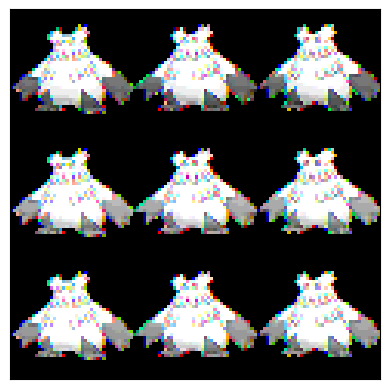

In [43]:
# TO DO:
# - load the image with index '0' from the dataset (hint: you can use 'dataset[0]', which is the same as '__getitem__(index)')
# - print its shape, display the pokemon's name, and plot the image
x = dataset.__getitem__(0)
image_path = image_path_list[0]
name = image_path.replace('../datasets/image_corpus/', '').replace('.png', '')
print(x[0].shape)
print(name)

# plot 
plt.figure()
plt.imshow(x[0])
plt.xticks([]), plt.yticks([])
plt.show()


### Dataloader

A `Dataset` object stores all the data, and it might be very large. In practice, when using deep neural networks, we want to divide it into small packs (or *minibatches*) of data, in order to feed the network and compute stochatstic gradient descent. To that end, we create a `Dataloader`: it's a python class which samples over the dataset (that's the *batch sampler*) and assembles the data and labels (using a *collate function*) to generate batches.

&nbsp;
<center><a href="https://twitter.com/i/status/1363494433715552259">
    <img src="https://pbs.twimg.com/ext_tw_video_thumb/1363493414361305099/pu/img/x_qwSxBU2l0o5Y2z.jpg" width="500"></a>
</center>
<center>
(click on the image above to check the animation)
</center>
&nbsp;

The good news is that there's a Pytorch function that does it automatically, so we don't need to bother with coding the batch sampler nor the collate function.

In [44]:
# Set the batch size (=number of samples/images in each batch) and create the dataloader
batch_size = 5
image_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

torch.Size([5, 120, 120, 3])


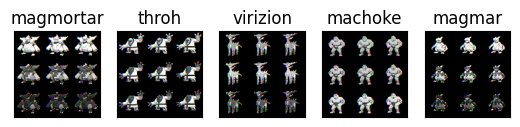

In [45]:
# Take one batch and print the shape of the image tensor
image_batch_data, image_batch_name = next(iter(image_dataloader))
print(image_batch_data.shape)

# Plot the images along with the corresponding names
plt.figure()
for ib in range(batch_size):
    plt.subplot(1, batch_size, ib+1)
    plt.imshow(image_batch_data[ib, :])
    plt.title(image_batch_name[ib])
    plt.xticks([]), plt.yticks([])
plt.show()

In [46]:
# The total number of batches can be access easily
print('Dataloader length (number of batches):', len(image_dataloader))

Dataloader length (number of batches): 31


In [47]:
# TO DO: iterate over the dataloader (use a for loop) and print the shape of each batch of image.
for i, (image_batch_data, image_batch_name) in enumerate(image_dataloader):
    print(image_batch_data.shape)


torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([5, 120, 120, 3])
torch.Size([1, 120, 120, 3])


You should remark from the code above that the last batch has a different size than the others. This is because in the dataset there are 151 images and the `batch_size` is 5: therefore there are 30 batches with 5 images, and the last batch contains the remaining 1 image.

To avoid this (which might be useful in some applications where you need to process each batch with the same size), you can get ridd of the last batch with a different size. To do so, simply use the `drop_last=True` option when defining the dataloader.

In [53]:
# TO DO: Define the dataloader while removing the last batch, and print the length of the new dataloader.
image_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)



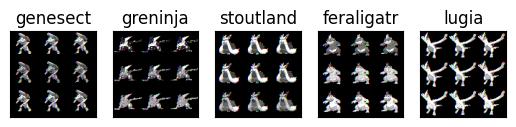

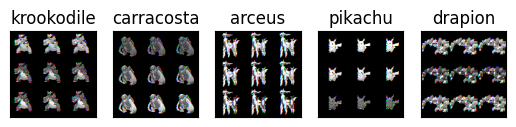

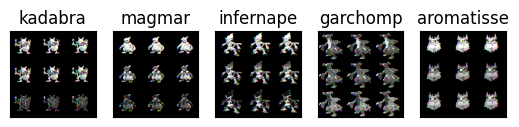

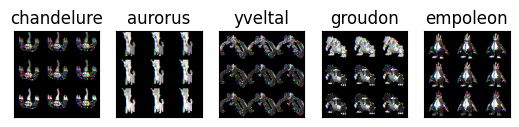

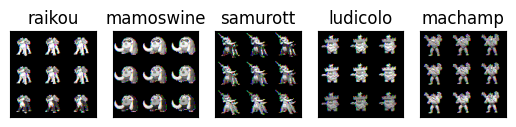

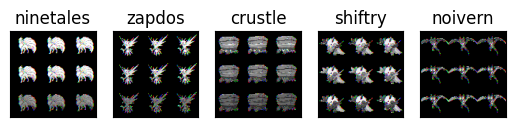

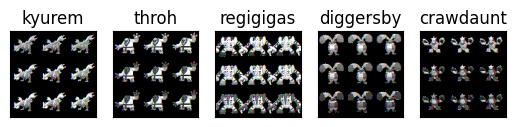

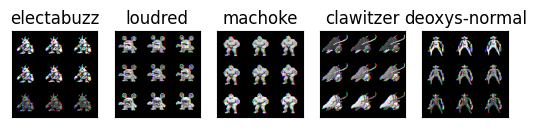

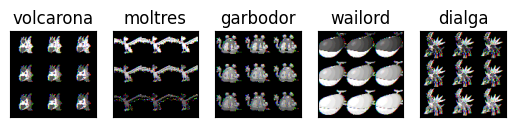

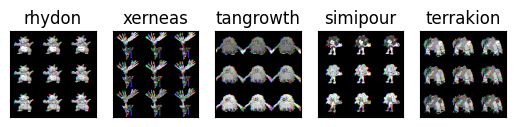

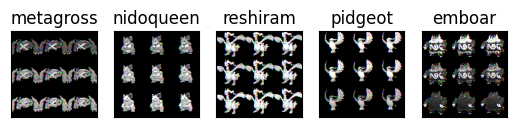

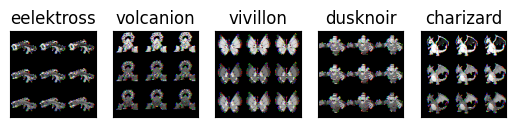

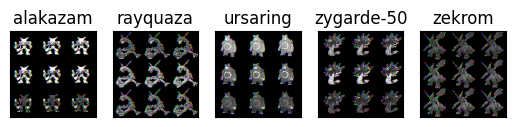

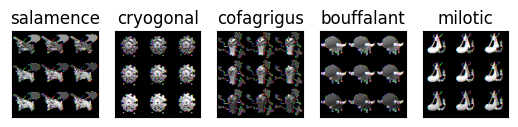

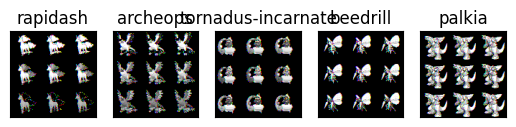

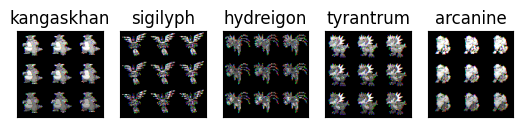

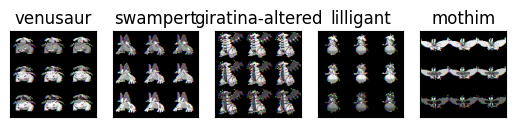

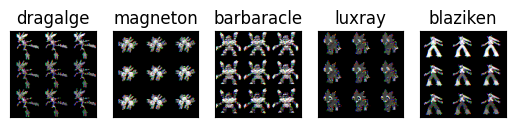

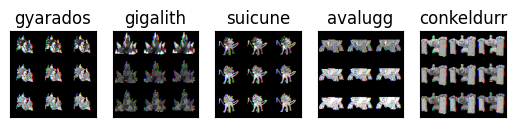

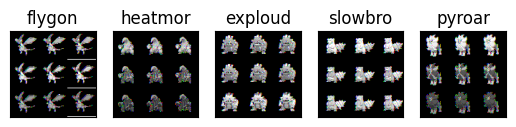

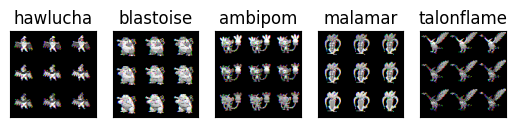

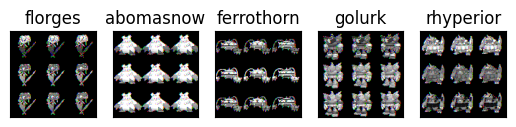

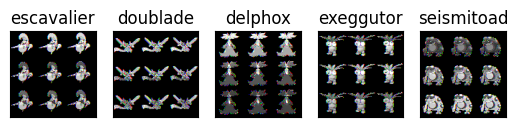

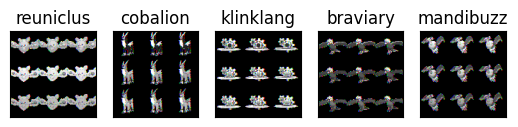

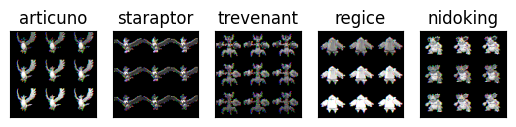

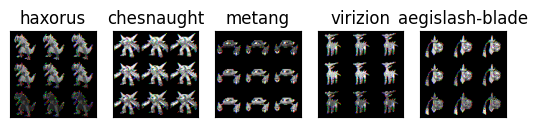

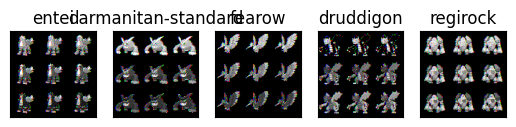

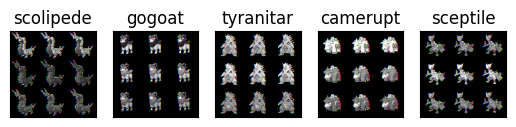

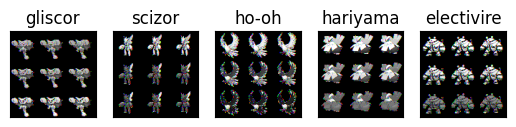

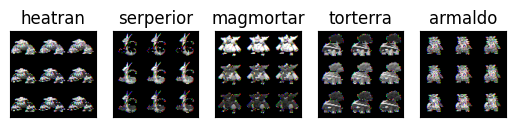

In [54]:
# TO DO: iterate over the dataloader and display all images with the name of the pokemon as title
for i, (image_batch_data, image_batch_name) in enumerate(image_dataloader):
    
    plt.figure()
    for ib in range(batch_size):
        plt.subplot(1, batch_size, ib+1)
        plt.imshow(image_batch_data[ib, :])
        plt.title(image_batch_name[ib])
        plt.xticks([]), plt.yticks([])
    plt.show()


## Speech data

Let's now work with speech data. The audio signals are provided in the `data/audio_corpus/` folder.

### Example

In [55]:
# Load an audio file using the torchaudio.load() function
x, sampling_frequency = torchaudio.load('../datasets/audio_corpus/arctic_a0001.wav')

# Print the shape of x: it should be [n_channels, n_samples], so since it's mono (n_channels=1), you can squeeze it
print(x.shape)
x = x.squeeze()
print(x.shape)

torch.Size([1, 53680])
torch.Size([53680])


In [56]:
# Print the sampling frequency
print('Sampling frequency:', sampling_frequency, 'Hz')

# The duration of the signal (in seconds) can be computed as follows:
duration = len(x) / sampling_frequency
print('Duration:', duration, 's')

# We can use the 'display(Audio())' function to have a graphical audio reader
display(Audio(data=x, rate=sampling_frequency))

Sampling frequency: 16000 Hz
Duration: 3.355 s


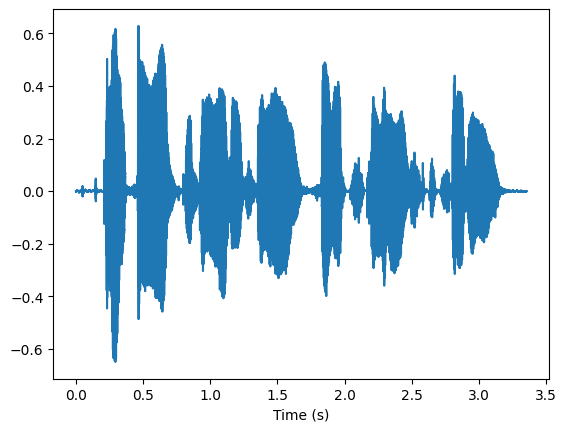

In [57]:
# We can plot the audio waveform as a function of time (in seconds)
time_indices = torch.arange(len(x)) / sampling_frequency
plt.figure()
plt.plot(time_indices, x)
plt.xlabel('Time (s)')
plt.show()

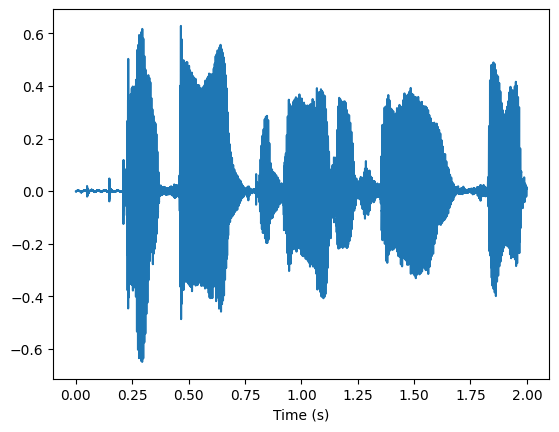

In [58]:
# Define the maximum duration (in seconds and in number of samples)
max_dur = 2.0
max_len = int(max_dur * sampling_frequency)

# TO DO: Set the signal x at this maximum duration defined above
# - if the length of x is larger than max_len, then crop it
# - if the length of x is smaller than max_len, then add zeros (use cat) accordingly at the end of the signal
# Plot the result

if len(x) > max_len:
    x = x[:max_len]
else:
    x = torch.cat((x, torch.zeros(max_len - len(x))))

plt.figure()
plt.plot(time_indices[:max_len], x)
plt.xlabel('Time (s)')
plt.show()

### Dataset and dataloader

Now, we can create the speech Dataset.

In [59]:
class SpeechDataset(Dataset):

    def __init__(self, audio_dir, max_dur):
        """Initialize the attributes of the object of the class."""
        self.audio_dir = audio_dir
        self.max_dur = max_dur
        self.audio_path_list = sorted(self._find_files(audio_dir))

    def __len__(self):
        """Return the size of the dataset."""
        return len(self.audio_path_list)

    def __getitem__(self, index):
        """Return a data sample (= speech signal) for a given index."""
        
        # TO DO:
        # - get the audio path corresponding to 'index' (use the list 'self.audio_path_list')
        # - get the name of the audio (as for images, use '.replace()')
        # - load the speech signal into a tensor x
        # - squeeze x to remove the useless dimension
        # - use a method (which you have to code) to set the length of x at a given duration 'self.max_dur'
        # - return x and the name of the audio
        audio_path = self.audio_path_list[index]
        name = audio_path.replace('../datasets/audio_corpus/', '').replace('.wav', '')
        x, sampling_frequency = torchaudio.load(audio_path)
        x.squeeze()
        len_x = self._set_duration(x, self.max_dur, sampling_frequency)
        return x, name
    
    
    def _find_files(self, directory, pattern='*.wav'):
        """Recursively find all files matching the pattern."""
        audio_path_list = []
        for root, dirnames, filenames in os.walk(directory):
            for filename in fnmatch.filter(filenames, pattern):
                audio_path_list.append(os.path.join(root, filename))
        return audio_path_list
    
    def _set_duration(self, y, max_dur, sampling_frequency=16000):
        """Set the input signal at a specified duration."""
        # TO DO: code it
        max_len = int(max_dur * sampling_frequency)
        if len(y) > max_len:
            y = y[:max_len]
        else:
            y = torch.cat((y, torch.zeros(max_len - len(y))))
        return y
        

In [61]:
# TO DO: Instanciate the dataset (specify the audio directory and a maximum duration of 2 seconds),
# Print the dataset's length, and the list of files
# We can initialize the dataset by providing the directory of the image corpus data
audio_dir = '../datasets/audio_corpus/'
dataset = SpeechDataset(audio_dir=audio_dir, max_dur=2.0)   

# You can use the '_find_files' method to get the list of images paths
audio_path_list = dataset._find_files(audio_dir)

# Equivalently, since this list is stored as an inner attribute, you can access it directly:
audiio_path_list = dataset.audio_path_list

# Display all file paths
for l in audio_path_list:
    print(l)
print('Number of audio in the list', len(audio_path_list))


../datasets/audio_corpus/arctic_a0014.wav
../datasets/audio_corpus/arctic_a0002.wav
../datasets/audio_corpus/arctic_a0005.wav
../datasets/audio_corpus/arctic_a0003.wav
../datasets/audio_corpus/arctic_a0009.wav
../datasets/audio_corpus/arctic_a0013.wav
../datasets/audio_corpus/arctic_a0006.wav
../datasets/audio_corpus/arctic_a0008.wav
../datasets/audio_corpus/arctic_a0004.wav
../datasets/audio_corpus/arctic_a0011.wav
../datasets/audio_corpus/arctic_a0012.wav
../datasets/audio_corpus/arctic_a0010.wav
../datasets/audio_corpus/arctic_a0015.wav
../datasets/audio_corpus/arctic_a0007.wav
../datasets/audio_corpus/arctic_a0001.wav
Number of audio in the list 15


In [ ]:
# TO DO: load the speech signal with index '0' from the dataset (and its name), print its shape,
# plot the signal (with the name as title) and the graphical audio reader

x = dataset.__getitem__(0)
audio_path = audio_path_list[0]



In [ ]:
# TO DO: create a dataloader (batch size of 3), iterate over the dataloader and plot all the signals with name as title
